In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm


In [2]:

import sys
# from prody import *
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from io import StringIO
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def GetPandasDataROC(data):
    name = []
    efs = []
    method = []
    for col in data.columns:
        # if 'ROC' in col:
        name.extend([col]*len(data))
        efs.extend(data[col].values)
        # method.extend(data['Method'].values)
    efs_df = pd.DataFrame({'name':name,
                        'efs':efs})
    efs_df = efs_df.fillna(0.0)
                        
    return efs_df
def GetPandasDataRef(data,ref_col = None,name = None):
    names = []
    efs = []
    # method = []
    for col in data.columns:
        if ref_col == col:
            names.extend([name]*len(data))
            efs.extend(data[col].values)
        # method.extend(data['Method'].values)
    efs_df = pd.DataFrame({'name':names,
                        'efs':efs})
    efs_df = efs_df.fillna(0.0)
                        
    return efs_df

In [4]:
# !pip install xlrd
excel_file = 'dud-e_results_bbaa070.xls'
df = pd.read_excel(excel_file,sheet_name = None)

# 遍历所有 sheet
glide_sp_sheets = []
glide_sp_sheets_names = []
for sheet_name, sheet_df in df.items():
    # 对当前 sheet 进行处理
    if 'Glide_SP' in sheet_name and 'Glide_SP_LogAUC' != sheet_name and 'Glide_SP_EF0.1%' != sheet_name:
        glide_sp_sheets.append(sheet_df[:-3])
        glide_sp_sheets_names.append(sheet_name)
        print(f'Sheet name: {sheet_name}')
    # print(sheet_df)
    # break

Sheet name: Glide_SP_AUROC
Sheet name: Glide_SP_BEDROC
Sheet name: Glide_SP_EF0.5%
Sheet name: Glide_SP_EF1%
Sheet name: Glide_SP_EF5%


In [5]:
sheet_df[:-3]

,Target Name,Glide SP,deltaVinaRF,RFscore-VS,pafnucy,OnionNet,RFscorev4,RFscorev3,NNscore1.0,NNscore2.0,NNscore(ODDT),RFscorev1(ODDT),RFscorev2(ODDT),RFscorev3(ODDT),PLECRF(ODDT)
0,AA2AR,6.135759,0.757901,12.129376,1.326651,4.406375,0.734396,0.639635,3.648289,3.127867,0.402733,1.445101,5.046010,4.193163,2.700681
1,ABL1,8.118508,2.961736,12.825878,2.456019,2.319574,1.842014,2.046683,2.319574,2.659259,2.865356,0.477559,2.251351,2.046683,9.892299
2,ACE,0.279261,1.035088,4.087372,0.863172,0.482361,2.640290,2.843389,1.904055,0.562565,2.234092,3.274975,3.985823,3.960435,2.208704
3,ACES,5.030120,3.973541,9.759036,3.885542,5.632530,4.698795,5.120482,5.060241,3.890825,1.626506,2.048193,3.072289,3.463855,2.289157
4,ADA,0.686185,0.228447,8.691678,0.914913,1.143642,0.914913,1.067399,1.677341,2.744740,0.533699,2.058555,1.677341,0.762428,0.686185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,TYSY,7.221781,1.375879,5.996657,1.547524,1.096163,1.547524,1.031683,2.450247,0.773762,1.547524,1.934406,2.772648,2.901608,0.451361
98,UROK,6.200661,5.568219,12.531863,0.195810,1.762293,1.501213,2.610805,4.046747,1.761604,0.913782,0.652701,2.088644,1.305402,0.913782
99,VGFR2,7.223294,3.418423,10.028769,0.838418,2.708735,1.322121,1.322121,3.772881,2.868847,1.967058,1.676836,0.999652,1.999304,5.739939
100,WEE1,16.907764,17.944911,17.490790,10.202961,3.498158,15.741711,14.575658,6.121777,11.806283,13.409606,0.437270,12.389310,14.575658,9.036908


In [1]:
sheets_names = []
all_baseline_df = []
for sheet_name,sheet_df in zip(glide_sp_sheets_names,glide_sp_sheets):
    sheet_df = sheet_df.drop('Target Name',axis = 1)
    # print(sheet_name)
    sheet_df = GetPandasDataROC(sheet_df)
    paths = ['deepdock_dude.csv',\
            'DUDE_SP_EquiScore.xlsx',\
            'rtmscore_dude.csv',\
            'tankbind_dude.csv',\
            'rtmscore_noduplicated_with_pdbbind2020.csv',\
            'kdeep_dude.csv',\
            '3dgnn_DUDE.csv',\
            'pignet_DUDE.csv',\
            'tankbind_noduplicated_with_pdbbind2020.csv',\
            'deepdock_noduplicated_with_pdbbind2020.csv',\
            'kdeep_noduplicated_with_pdbbind2020.csv',\
            '3dgnn_noduplicated_with_pdbbind2020.csv',\
            'pignet_noduplicated_with_pdbbind2020.csv']
    model_names = ['DeepDock','EquiScore','RTMscore','Tankbind','RTMscore*',\
                   'Kdeep','GNN-DTI','PIGNet','Tankbind*','DeepDock*','Kdeep*',\
                    'GNN-DTI*','PIGNet*']
    my_dfs = []
    for my_basline_name, my_baseline_path in zip(model_names,paths):
        try:
            my_df = pd.read_csv(my_baseline_path)
        except:
            my_df = pd.read_excel(my_baseline_path)
        try:
            if 'noduplicated' in my_baseline_path:
                my_df.columns = ['target','EF0.1%','EF0.5%','EF1%','EF5%','EF10.0%',\
                            'EF50.0%','AUROC','LogAUROC','AUPRC','BEDROC','0.1%HIT','0.5%HIT',\
                                '1.0%HIT','5.0%HIT','10.0%HIT','50.0%HIT','dup']
            else:

                my_df.columns = ['target','EF0.1%','EF0.5%','EF1%','EF5%','EF10.0%',\
                            'EF50.0%','AUROC','LogAUROC','AUPRC','BEDROC','0.1%HIT','0.5%HIT',\
                                '1.0%HIT','5.0%HIT','10.0%HIT','50.0%HIT']
        except Exception as e:
            print(f'errors in {my_baseline_path} skip',e)
        
        
        my_df = GetPandasDataRef(my_df,ref_col = sheet_name.split('_')[-1],name = my_basline_name)
        my_dfs.append(my_df)
    print(len(my_dfs))
    my_dfs = pd.concat(my_dfs,axis = 0)
    print(len(my_dfs))
    sheets_names.append(sheet_name)
    all_baseline_df.append(pd.concat([sheet_df,my_dfs],axis = 0))
    
    # 按照sheet_name找

NameError: name 'glide_sp_sheets_names' is not defined

In [18]:
sheet_df[sheet_df['name'] == 'RFscore-VS']

,name,efs
204,RFscore-VS,11.056657
205,RFscore-VS,12.466789
206,RFscore-VS,6.609801
207,RFscore-VS,10.167669
208,RFscore-VS,6.638891
...,...,...
301,RFscore-VS,9.385305
302,RFscore-VS,14.648817
303,RFscore-VS,9.068200
304,RFscore-VS,18.075742


In [19]:
sheets_names

['Glide_SP_AUROC',
 'Glide_SP_BEDROC',
 'Glide_SP_EF0.5%',
 'Glide_SP_EF1%',
 'Glide_SP_EF5%']

In [20]:
sheet_df = all_baseline_df[0]
sheet_name = sheets_names[0]

In [21]:
# all_baseline_df[-1]

In [22]:
orders = sheet_df.groupby('name').agg(np.mean).reset_index().sort_values('efs',ascending = False).name.to_list()

In [23]:
sheet_df.groupby('name').agg(np.mean).reset_index().sort_values('efs',ascending = False)

,name,efs
15,RFscore-VS,0.858827
23,Tankbind,0.777893
2,EquiScore,0.775716
5,Glide SP,0.767022
12,PIGNet,0.755531
21,RTMscore,0.732934
6,Kdeep,0.708253
25,deltaVinaRF,0.696745
10,NNscore2.0,0.682558
13,PIGNet*,0.673572


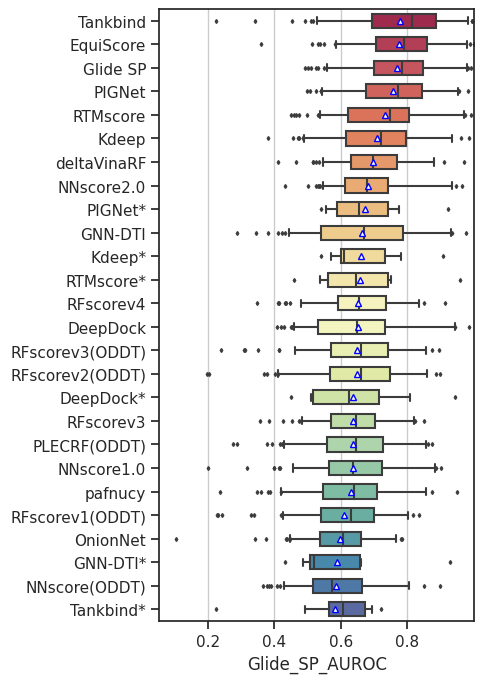

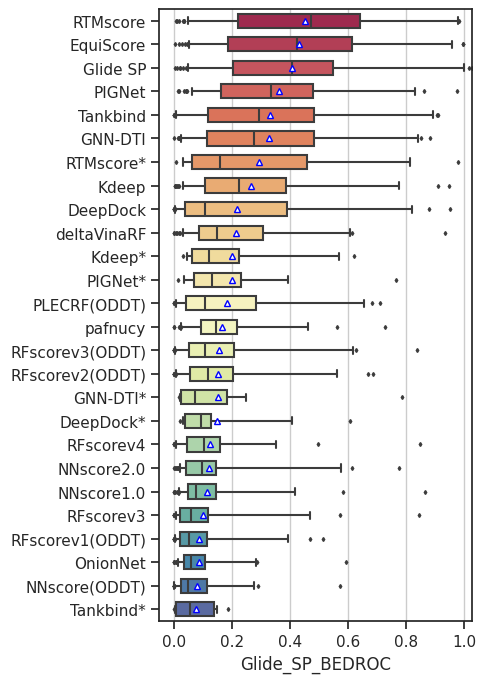

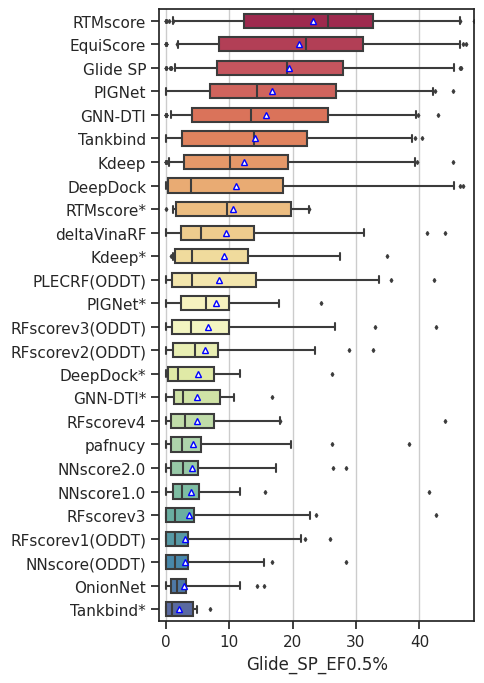

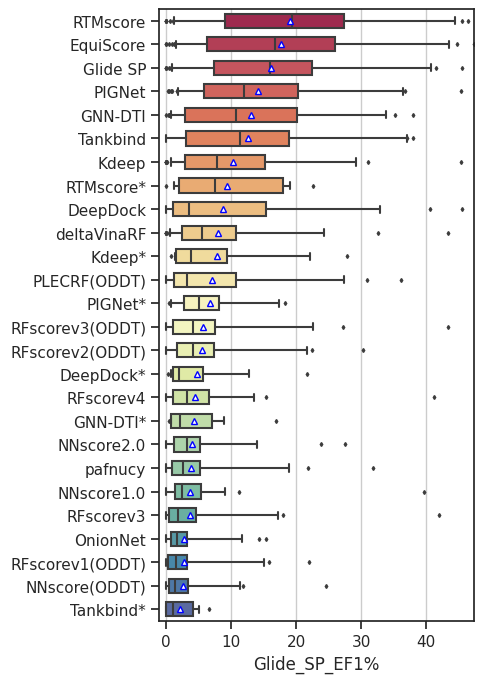

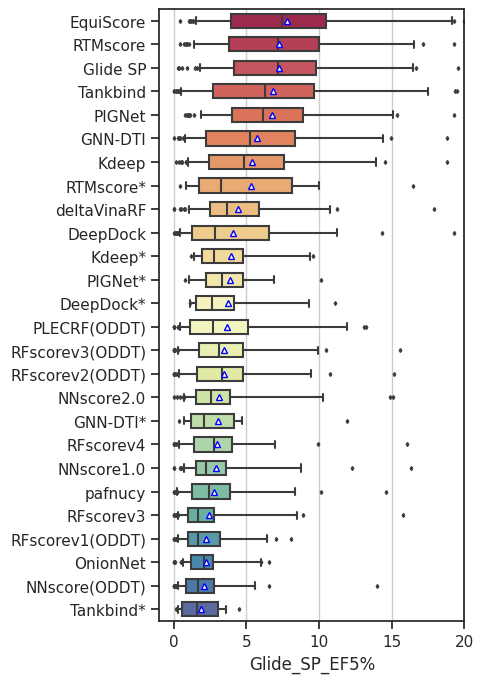

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

for sheet_name ,sheet_df in zip(sheets_names,all_baseline_df):
       sheet_df = sheet_df[sheet_df['name'] != 'RFscore-VS']
       orders = sheet_df.groupby('name').agg(np.mean).reset_index().sort_values('efs',ascending = False).name.to_list()
       mean_order_df = sheet_df.groupby('name').agg(np.mean).reset_index().sort_values('efs',ascending = False)
       mean_order_df.to_csv('/result_ladder_figs/dude1/glideSP/{}.csv'.format(sheet_name.split('_')[-1]))
       sns.set_theme(style="ticks", )
       f, ax = plt.subplots(figsize=(5, 7))
       sns.boxplot(x="efs", y="name", data=sheet_df,palette="Spectral",
              whis=[5, 99], width=.6,order = orders,showmeans=True,meanprops={"marker":"^",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"blue",
                            "markersize":"5"},fliersize = '2')
       ax.xaxis.grid(True)
       # ax.set_theme(style="ticks", palette=sns.color_palette("coolwarm"))
       ax.set(xlim=(sheet_df['efs'].min() -1 if sheet_df['efs'].max() > 5 else sheet_df['efs'].min() - 0.05 , sheet_df['efs'].max()), ylabel="",
              xlabel="%s"%sheet_name,)
       # sns.despine(left=True, bottom=True)
       plt.tight_layout()
       plt.savefig('/result_ladder_figs/dude1/glideSP/{}.png'.format(sheet_name.split('_')[-1]),dpi=660,format='png')